# **Classification Gender**

- Import Library

In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

- Load Data

In [2]:
df = pd.read_csv('../dataset/gender.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


## Data Preprocessing

In [3]:
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

- Handiling Missing & Duplicates Values

In [4]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(1768)

In [6]:
df = df.drop_duplicates()

In [7]:
label = LabelEncoder()
df['gender'] = label.fit_transform(df['gender'])

- Data Splitting

In [8]:
X = df.drop('gender', axis=1)
y = df['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Modeling & Evaluation

- SVM

In [10]:
model_svm = SVC()
model_svm.fit(X_train_scaled, y_train)

y_pred_svm = model_svm.predict(X_test_scaled)
print("Akurasi :", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Akurasi : 0.9582689335394127
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       308
           1       0.96      0.96      0.96       339

    accuracy                           0.96       647
   macro avg       0.96      0.96      0.96       647
weighted avg       0.96      0.96      0.96       647



- Decision Tree

In [11]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

y_pred_tree = model_tree.predict(X_test) 
print("Akurasi : ", accuracy_score(y_test,y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Akurasi :  0.9474497681607419
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       308
           1       0.95      0.95      0.95       339

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647



- K Nearest Neighbor

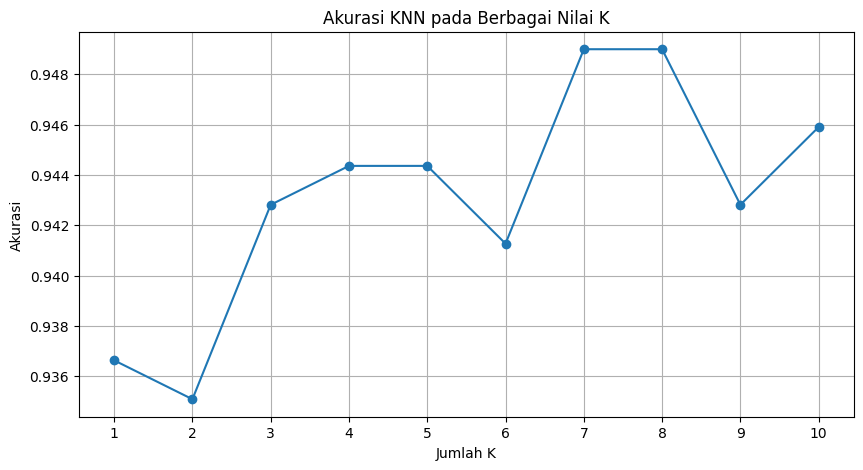

Nilai k terbaik: 7 dengan akurasi 0.95
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       308
           1       0.98      0.92      0.95       339

    accuracy                           0.95       647
   macro avg       0.95      0.95      0.95       647
weighted avg       0.95      0.95      0.95       647



In [15]:
k_values = list(range(1,11))
acc = []
best_model = None
best_pred = None
for k in k_values:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train_scaled, y_train)
    y_pred_knn = model_knn.predict(X_test_scaled)
    accu = accuracy_score(y_test, y_pred_knn)
    acc.append(accu)

    if accu == max(acc):
        best_model  = model_knn
        best_pred = y_pred_knn

plt.figure(figsize=(10,5))
plt.plot(k_values, acc, marker='o')
plt.title("Akurasi KNN pada Berbagai Nilai K")
plt.xlabel("Jumlah K")
plt.ylabel("Akurasi")
plt.xticks(k_values)
plt.grid(True)
plt.show()

best_k = k_values[acc.index(max(acc))]
print(f"Nilai k terbaik: {best_k} dengan akurasi {max(acc):.2f}")
print(classification_report(y_test, best_pred))


## Testing